# Auto clustering

In [10]:
%matplotlib inline
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.backend import abs as KERAS_ABS
from sklearn.cluster import KMeans

# Set global random seed for numpy and sklearn for reproducibility.
np.random.seed(42)

In [11]:
# Important to use utf-8, as 'açaí' will need a better encoding than default ascii
with open('historical-database.csv', 'r', encoding='utf-8') as f:
    data = f.read()

data = data.split('\n')
# Separating columns manually
columns = data[0]
data = data[1:-1]
# Remove ending comma, then split by semi-colon
columns = columns[:-1].split(';')

# Transform dates
def date_handler(date: pd.Timestamp):
    return date.year - 1974

def process_line(line: str) -> list:
    entries = line.split(';')
    if ',' in entries[-1] and len(entries[-1])>1:
        entries[-1] = float(entries[-1].replace(',','.',-1))
    elif len(entries[-1]) <= 1:
        entries[-1] = None
    else:
        entries[-1] = float(entries[-1])
    # Convert to python-friendly date format.
    entries[0] = datetime.datetime.strptime(entries[0],"%d/%m/%Y")
    return entries
data = list(map(process_line, data))
df = pd.DataFrame(data=data, columns=columns)
df['year'] = df['year'].apply(date_handler)
df

,year,city_code,product_type,product,destinated_area
0,0,960b4f2c94a2fb2c,temporary,Others,0.0000
1,0,746cc42bfb8f6b62,temporary,Others,0.0000
2,0,6cce2bf873870afc,temporary,Others,0.0000
3,0,4de42e351006a2ae,temporary,Others,0.0000
4,0,5b6072f8f6d37acc,temporary,Others,0.0000
...,...,...,...,...,...
73739,39,74d75dde6dc4a5ec,pasture,Livestock,150866.5644
73740,40,74d75dde6dc4a5ec,pasture,Livestock,152446.3960
73741,41,74d75dde6dc4a5ec,pasture,Livestock,154681.0205
73742,42,74d75dde6dc4a5ec,pasture,Livestock,164706.2778


In [12]:
oh_enc = OneHotEncoder(handle_unknown='ignore')
enc = oh_enc.fit_transform(df.drop('destinated_area', axis=1)[['product_type', 'product', 'city_code']]).toarray()
enc.shape

(73744, 158)

3


C:\Users\cadud\AppData\Local\Temp\ipykernel_912\461586236.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


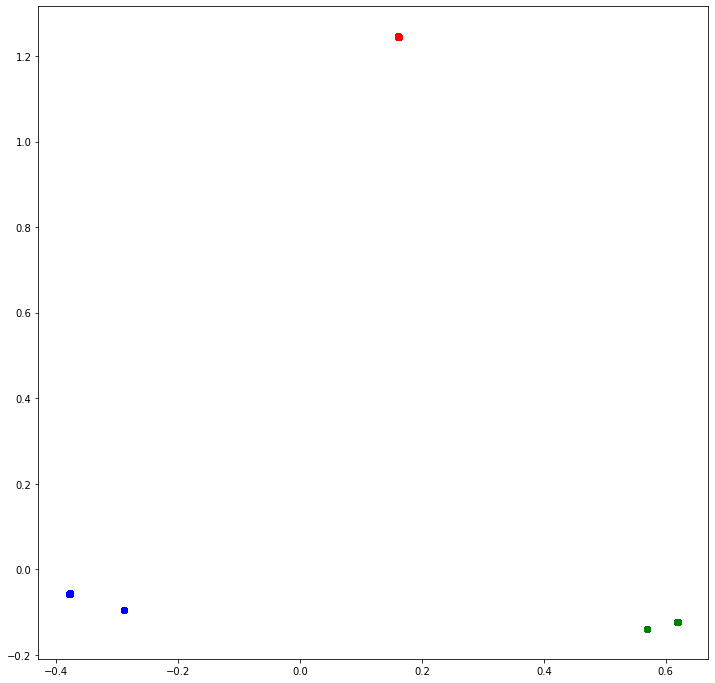

In [27]:
# Try to find one cluster for each product_type
n_types = len(list(df['product_type'].value_counts()))
print(n_types)
clusterize_by_type = KMeans(n_clusters=n_types, max_iter=1000)
X = clusterize_by_type.fit_transform(enc)
classes = clusterize_by_type.labels_
labels = list(set(classes))
colors = 'b g r c m y k'.split(' ')

# Reduce dimension if necessary to visualize
if X.shape[1] > 2:
    pca = PCA(2)
    X = pca.fit_transform(X)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cats = [[] for _ in labels]
for p, c in zip(X, classes):
    cats[c].append(p)
cats = [np.array(a) for a in cats]
for i, e in enumerate(cats):
    ax.scatter(e[:,0], e[:,1], color = colors[i%len(colors)])
fig.show()

C:\Users\cadud\AppData\Local\Temp\ipykernel_912\3869613241.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


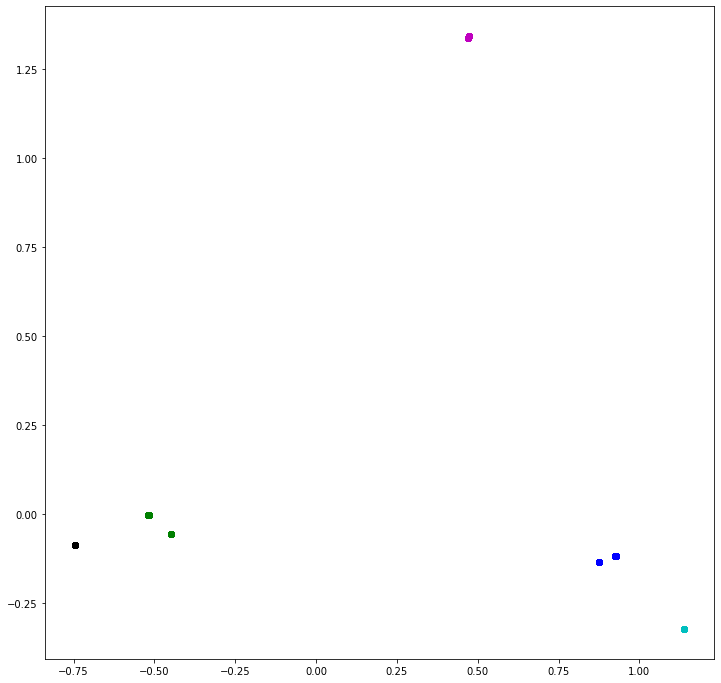

In [33]:
# Try to find five cluster (Number cherry-picked after first visualization)
n_types = 7
clusterize_by_type = KMeans(n_clusters=n_types, max_iter=1000)
X = clusterize_by_type.fit_transform(enc)
classes = clusterize_by_type.labels_
labels = list(set(classes))
colors = 'b g r c m y k'.split(' ')

# Reduce dimension if necessary to visualize
if X.shape[1] > 2:
    pca = PCA(2)
    X = pca.fit_transform(X)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cats = [[] for _ in labels]
for p, c in zip(X, classes):
    cats[c].append(p)
cats = [np.array(a) for a in cats]
for i, e in enumerate(cats):
    ax.scatter(e[:,0], e[:,1], color = colors[i%len(colors)])
fig.show()